# Aula 5 - Inteligência de Enxame

## Ideia Central

A "Inteligência" que surge da interação entre agentes que, individualmente, não apresentam esta característica.

### I - ACO (Ant Colony Optimization)

#### Metáfora
- O uso de ferômonios como marcadores ambientais;
- Deslocamento das formigas dependente da concentração de feromônios localmente;

#### A probabilidade de uma formiga sair do ponto Xi ao ponto Xj

$P_{ij} = \frac{{(\eta_{ij}^\alpha) \cdot (N_{ij}^\beta)}}{{\sum_k{(\eta_{ik}^\alpha) \cdot (N_{ik}^\beta)}}}$


Nesta equação:* $P_{ij}$ representa a probabilidade de uma formiga se mover do ponto $x_i$ para o ponto $x_j$.
* $\eta_{ij}$ é a visibilidade do arco $(x_i, x_j)$, geralmente definida como a inversa da distância entre $x_i$ e $x_j$.
* $N_{ij}$ é o nível de feromônio no arco $(x_i, x_j)$.
* $\alpha$ e $\beta$ são parâmetros que controlam a influência relativa da visibilidade e do feromônio na probabilidade de movimento das formigas.
* A soma no denominador ($\sum_k$) é uma soma sobre todos os arcos possíveis que uma formiga pode visitar a partir de $x_i$. Isso normaliza as probabilidades, garantindo que a probabilidade total de movimento seja igual a 1.1.

---
Após todas as formigas terem feito suas rotas, é calculada uma variação deltaEtaij para a quantidade de feromônio no trecho Xi -> Xj

* deltaEtaij pode ser calculada de diversas maneiras:

1. Adicionar uam quantidade fica **Q** para cada formiga que recorreu Xi -> Xj.
2. Adicionar **Q/Tk**, sendo **Q** fixo para cada formiga **k** que percorreu Xi -> Xj sendo **Tk** o comprimento total de sua rota.
3. O mesmo anterior, mas só há variação para os trechos Xi -> Xj que pertencem à melhor rota encontrada.

As quantidades de feromônios são atualizadas:

Etaij <- (1-p)Etaij + DeltaEtaij

em que o p é uma taxa de decaimento entre 0 e 1

Por final repita até alcançar um critério de parada.
---

#### Exemplo: ACO Aplicado ao TSP (Traveling Salesman Problem)

Dado um conjunto de pontos e o custo de deslocamento entre um ponto e outro, encontrar uma rota que percorra todos os pontos com custo mínimo.

O problema do Caixeiro Viajante (TSP) é um dos problemas de otimização mais conhecidos e desafiadores. Ele envolve encontrar o caminho mais curto que visita todas as cidades em um conjunto exatamente uma vez e retorna à cidade de origem. Vamos explorar como o Ant Colony Optimization (ACO) pode ser aplicado a este problema clássico.

Definição do Problema TSP:

Suponha que temos um conjunto de cidades e as distâncias entre todas as possíveis duplas de cidades são conhecidas. O objetivo é encontrar a ordem de visitação das cidades que minimize a distância total percorrida, começando e terminando na mesma cidade.

Aplicação do ACO ao TSP:

Aqui estão os passos principais para aplicar o ACO ao TSP:

Modelagem do Problema: Cada formiga virtual representa uma possível rota para o caixeiro viajante. Inicialmente, todas as formigas começam em cidades diferentes.

Caminhos e Feromônios: Para cada par de cidades, há um caminho associado a ele e uma quantidade de feromônio. No início, os feromônios são definidos com um valor inicial arbitrário.

Ciclo de Busca: As formigas virtuais começam a construir suas rotas passo a passo. Em cada passo, uma formiga escolhe a próxima cidade com base nas informações locais (distância para a cidade próxima) e nas informações globais (feromônio presente nos caminhos).

Atualização de Feromônio: Após cada ciclo de busca, as formigas atualizam a quantidade de feromônio nos caminhos com base na qualidade das soluções encontradas. Caminhos que fazem parte da rota da melhor solução recebem uma atualização maior de feromônio.

Evolução da Colônia: Com o tempo, a concentração de feromônio nos caminhos mais curtos aumenta, tornando esses caminhos mais atraentes para as formigas. A colônia tende a convergir para uma solução que representa a rota ótima.

Resultados Esperados:

O ACO aplicado ao TSP tem o potencial de encontrar soluções de alta qualidade para o problema, especialmente em instâncias onde a busca exaustiva seria computacionalmente inviável devido a um grande número de cidades. O algoritmo é capaz de explorar diferentes caminhos e, com o tempo, convergir para um caminho ótimo ou subótimo, dependendo da configuração dos parâmetros.

No entanto, a eficácia do ACO no TSP depende da escolha adequada dos parâmetros, como a taxa de evaporação de feromônio, a influência do feromônio nas escolhas das formigas e o número de formigas. Ajustar esses parâmetros corretamente é crucial para obter os melhores resultados.

Em resumo, o ACO é uma abordagem poderosa para resolver o problema do Caixeiro Viajante e muitos outros problemas de otimização combinatória, aproveitando o comportamento das formigas virtuais para encontrar soluções eficientes.

#### Exemplo detalhado TSP com ACO

Primeiro, você precisará instalar o pacote `ant-colony-optimization`. Você pode fazer isso usando o `pip`:

Aqui está o código de exemplo:

In [8]:
import numpy as np
import random

# Define as cidades e suas coordenadas (x, y)
cities = {
    "A": (0, 0),
    "B": (2, 4),
    "C": (5, 2),
    "D": (7, 8),
    "E": (1, 6),
}

# Calcula a matriz de distâncias entre as cidades
num_cities = len(cities)
distances = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            x1, y1 = cities[list(cities.keys())[i]]
            x2, y2 = cities[list(cities.keys())[j]]
            distances[i][j] = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Configuração do ACO
num_ants = 10
num_iterations = 100
alpha = 1.0
beta = 3.0
rho = 0.5
q0 = 0.7

pheromones = np.ones((num_cities, num_cities))  # Matriz de feromônio inicial

best_tour = None
best_distance = float("inf")

# Executa o ACO para resolver o TSP
for _ in range(num_iterations):
    tours = []
    tour_distances = []

    for ant in range(num_ants):
        tour = []
        current_city = random.randint(0, num_cities - 1)

        for _ in range(num_cities - 1):
            tour.append(current_city)
            unvisited_cities = [i for i in range(num_cities) if i != current_city]
            probabilities = [
                (pheromones[current_city][j] ** alpha) * (1.0 / distances[current_city][j] ** beta)
                for j in unvisited_cities
            ]
            total_prob = sum(probabilities)
            roulette_wheel = [p / total_prob for p in probabilities]
            next_city = np.random.choice(unvisited_cities, p=roulette_wheel)
            current_city = next_city

        tour.append(current_city)
        tours.append(tour)

        # Calcula a distância total do tour
        tour_distance = sum(distances[tour[i]][tour[i + 1]] for i in range(num_cities - 1))
        tour_distances.append(tour_distance)

        if tour_distance < best_distance:
            best_distance = tour_distance
            best_tour = tour

    # Atualiza as trilhas de feromônios
    pheromones *= (1.0 - rho)  # Evaporação
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                for tour, tour_distance in zip(tours, tour_distances):
                    if (i, j) in zip(tour, tour[1:]):
                        pheromones[i][j] += 1.0 / tour_distance

# Exibe a rota encontrada e a distância total
print("Melhor rota encontrada:", best_tour)
print("Distância total da rota:", best_distance)

Melhor rota encontrada: [4, 1, 4, 1, 4]
Distância total da rota: 8.94427190999916


Neste exemplo:

1. Definimos um conjunto de cidades e suas coordenadas (x, y).
2. Calculamos a matriz de distâncias entre todas as cidades com base nas coordenadas.
3. Configuramos o ACO com parâmetros como o número de formigas, o número de iterações, os parâmetros de influência alfa e beta, a taxa de evaporação de feromônio (rho) e o parâmetro q0.
4. Executamos o ACO para encontrar a melhor rota para o problema TSP.
5. Exibimos a rota encontrada e a distância total.

Lembre-se de que este é um exemplo simples para fins de demonstração. Para problemas TSP mais complexos, você pode precisar ajustar os parâmetros do ACO e considerar estratégias adicionais, como a inclusão de heurísticas específicas do problema.

#### Detalhamento

O Ant Colony Optimization (ACO) é uma técnica de otimização inspirada no comportamento das formigas reais, que é utilizada para resolver problemas de otimização combinatória, como o problema do caixeiro-viajante, roteamento de veículos, programação de horários e muitos outros. O ACO foi proposto por Marco Dorigo em 1992 e é um dos algoritmos populares na área de otimização.

A ideia central do ACO é modelar a busca por soluções ótimas como o comportamento de formigas que procuram por comida. Aqui estão os principais componentes e conceitos do ACO:

1. **Colônia de Formigas Virtuais:** No ACO, não estamos trabalhando com formigas reais, mas com formigas virtuais que existem apenas no contexto do algoritmo. Cada formiga virtual representa uma possível solução para o problema de otimização.
    
2. **Caminhos e Feromônios:** As formigas virtuais percorrem caminhos em busca da solução ótima. Cada caminho é associado a um valor chamado "feromônio". Os caminhos com uma maior concentração de feromônio são mais atraentes para as formigas.
    
3. **Exploração e Exploração:** As formigas podem seguir dois tipos de comportamento: exploração e exploração. Na exploração, uma formiga escolhe um caminho com base nas informações locais (por exemplo, quão próximo o próximo ponto é). Na exploração, uma formiga escolhe um caminho com base na quantidade de feromônio presente no caminho.
    
4. **Atualização de Feromônio:** Após cada ciclo de busca, as formigas virtuais atualizam a quantidade de feromônio nos caminhos com base na qualidade das soluções encontradas. Caminhos que levam a soluções melhores recebem uma atualização de feromônio maior.
    
5. **Evolução da Colônia:** Com o tempo, a colônia de formigas virtuais tende a convergir para a solução ótima, uma vez que os caminhos com melhores soluções acumulam mais feromônio, tornando-se mais atraentes para as formigas.
    
6. **Exploração Global vs. Local:** O ACO equilibra a exploração global (exploração de todo o espaço de busca) com a exploração local (concentração em regiões promissoras). Isso é alcançado por meio de parâmetros como a taxa de evaporação de feromônio e a influência do feromônio nas escolhas das formigas.
    
7. **Parametrização:** O ACO envolve a parametrização de vários fatores, como a taxa de evaporação de feromônio, a quantidade inicial de feromônio, os pesos das informações locais e globais, entre outros. A escolha adequada desses parâmetros é essencial para o desempenho do algoritmo.
    

O ACO é aplicável a uma ampla gama de problemas de otimização combinatória e é conhecido por encontrar soluções de alta qualidade. No entanto, o ACO pode ser sensível à escolha de parâmetros e pode exigir ajustes para obter o melhor desempenho em problemas específicos. Além disso, o ACO é um algoritmo baseado em população, o que significa que requer a manutenção de múltiplas soluções candidatas ao mesmo tempo. Portanto, ele pode ser computacionalmente intensivo em problemas de grande escala.

![Alt text](./../assets/formigas.png)

### II - PSO (Particle Swam Optimization)

O PSO, ou Particle Swarm Optimization, é um algoritmo de otimização que foi inspirado no comportamento social de enxames de pássaros e cardumes de peixes. Ele faz parte de um grupo de algoritmos de otimização baseados em população que são usados para encontrar soluções aproximadas para problemas complexos de otimização.

No PSO, uma população de soluções candidatas (partículas) é inicializada e movida através do espaço de busca em direção a uma solução ótima, com base na experiência coletiva das partículas. Cada partícula mantém uma posição e uma velocidade no espaço de busca, e essas informações são usadas para atualizar sua posição de acordo com seu desempenho e o desempenho das partículas vizinhas.

As principais características do PSO incluem:

1. **População de Partículas:** Um conjunto de soluções candidatas é criado, cada uma representada por uma partícula.
    
2. **Posição e Velocidade:** Cada partícula mantém sua posição atual e uma velocidade que indica a direção e a magnitude de seu movimento.
    
3. **Função de Fitness:** Um critério de avaliação (função de fitness) é usado para medir o quão boa é a solução representada pela posição da partícula no espaço de busca.
    
4. **Melhor Posição Pessoal (pBest):** Cada partícula mantém o registro de sua melhor posição pessoal com base em sua avaliação de fitness até o momento.
    
5. **Melhor Posição Global (gBest):** A melhor posição global entre todas as partículas da população é rastreada.
    
6. **Atualização das Partículas:** As partículas são atualizadas iterativamente, movendo-se em direção à sua melhor posição pessoal (pBest) e à melhor posição global (gBest). Isso é feito usando equações que combinam a velocidade atual, a posição atual e as informações das melhores posições.
    
7. **Convergência:** O algoritmo continua iterando até atender a um critério de parada, geralmente um número máximo de iterações ou uma convergência satisfatória.
    

O PSO é amplamente utilizado em problemas de otimização em que a busca por uma solução ótima é complicada por um grande espaço de busca ou pela complexidade da função objetivo. Ele tem aplicações em áreas como otimização de parâmetros, treinamento de redes neurais, design de antenas, roteamento de veículos, entre outros.

![Alt text](./../assets/pso.png)

#### Detalhamento

1. Particular são espalhadas aleatóriamente em um espaço de busca:

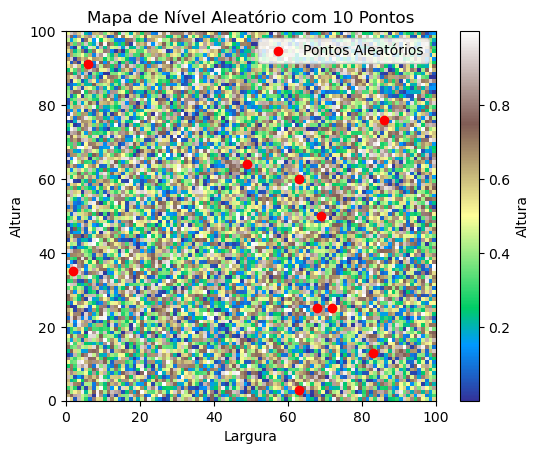

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tamanho do mapa
largura = 100
altura = 100

# Gere um mapa de nível aleatório
mapa_nivel = np.random.rand(altura, largura)

# Adicione 10 pontos aleatórios no mapa
num_pontos = 10
pontos_x = np.random.randint(0, largura, num_pontos)
pontos_y = np.random.randint(0, altura, num_pontos)
alturas_pontos = np.random.rand(num_pontos)

for i in range(num_pontos):
    mapa_nivel[pontos_y[i], pontos_x[i]] = alturas_pontos[i]

# Crie uma visualização do mapa de nível
plt.imshow(mapa_nivel, cmap='terrain', origin='upper', extent=[0, largura, 0, altura])
plt.colorbar(label='Altura')
plt.scatter(pontos_x, pontos_y, color='red', marker='o', label='Pontos Aleatórios')
plt.legend()
plt.title('Mapa de Nível Aleatório com 10 Pontos')
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.show()

2. Cada partícula é avaliada de acordo com uma função **f** que se deseja maximizar. Isto é: cada particula Xi recebe uma avaliação yi = f(Xi)
3. Calcula-se a velocidade de cada partícula: Vi = FIc*(Pi-Xi)+FIs*(G-Xi), em que: 

- FIc = peso de inércia cognitivo
- FIs = peso de inércia social
- Pi  = coordenadas do melhor ponto que a Partícula I foi melhor avaliada
- Xi  = posição da partícula
- G   = coordenadas da melhor partícula avaliada historicamente 

4. Cada Vi é adequada a um certo intervalo permitido de velocidades
5. A posição de cada partícula atualizada: Xi <- X + Vi, e adequada aos intervalos permitido
6. Repetir 2 a 5 até que um critério de parada seja atingido

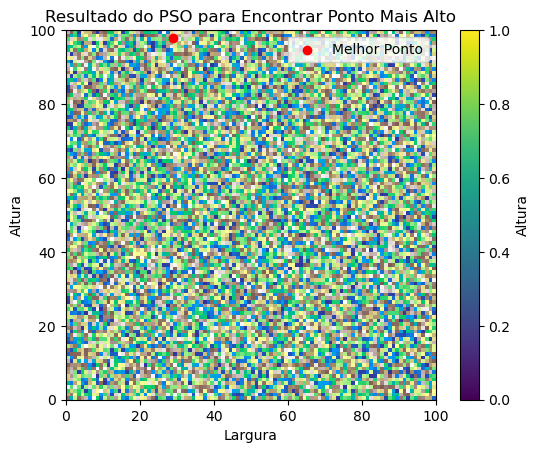

Melhor Ponto: (29, 98)
Altura: 0.9997475340263994


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tamanho do mapa
largura = 100
altura = 100

# Gere um mapa de nível aleatório
mapa_nivel = np.random.rand(altura, largura)

# Número de partículas (soluções candidatas)
num_particulas = 20

# Número máximo de iterações
num_iteracoes = 100

# Parâmetros do PSO
inercia = 0.5
coef_cognitivo = 1.5
coef_social = 1.5

# Inicialização das partículas (coordenadas x, y)
particulas_x = np.random.randint(0, largura, num_particulas)
particulas_y = np.random.randint(0, altura, num_particulas)

# Melhores posições pessoais iniciais das partículas
melhores_posicoes_pessoais_x = particulas_x.copy()
melhores_posicoes_pessoais_y = particulas_y.copy()

# Melhor posição global inicial
melhor_posicao_global_x = particulas_x[0]
melhor_posicao_global_y = particulas_y[0]
melhor_valor_global = mapa_nivel[particulas_y[0], particulas_x[0]]

# Lista para rastrear os melhores valores em cada iteração
melhores_valores_iteracao = []

# Loop de iteração do PSO
for iteracao in range(num_iteracoes):
    for i in range(num_particulas):
        # Avalie a função de fitness (altura no mapa de nível) para a partícula atual
        valor_atual = mapa_nivel[particulas_y[i], particulas_x[i]]
        
        # Atualize a melhor posição pessoal da partícula
        if valor_atual > mapa_nivel[particulas_y[i], particulas_x[i]]:
            melhores_posicoes_pessoais_x[i] = particulas_x[i]
            melhores_posicoes_pessoais_y[i] = particulas_y[i]
        
        # Atualize a melhor posição global, se aplicável
        if valor_atual > melhor_valor_global:
            melhor_valor_global = valor_atual
            melhor_posicao_global_x = particulas_x[i]
            melhor_posicao_global_y = particulas_y[i]
    
    # Atualize as posições das partículas usando o PSO
    for i in range(num_particulas):
        r1, r2 = np.random.rand(), np.random.rand()
        velocidade_x = (inercia * particulas_x[i] +
                        coef_cognitivo * r1 * (melhores_posicoes_pessoais_x[i] - particulas_x[i]) +
                        coef_social * r2 * (melhor_posicao_global_x - particulas_x[i]))
        
        r1, r2 = np.random.rand(), np.random.rand()
        velocidade_y = (inercia * particulas_y[i] +
                        coef_cognitivo * r1 * (melhores_posicoes_pessoais_y[i] - particulas_y[i]) +
                        coef_social * r2 * (melhor_posicao_global_y - particulas_y[i]))
        
        # Atualize as posições
        particulas_x[i] = int(particulas_x[i] + velocidade_x)
        particulas_y[i] = int(particulas_y[i] + velocidade_y)
        
        # Limite as posições dentro dos limites do mapa
        particulas_x[i] = max(0, min(largura - 1, particulas_x[i]))
        particulas_y[i] = max(0, min(altura - 1, particulas_y[i]))
    
    # Rastreie o melhor valor nesta iteração
    melhores_valores_iteracao.append(melhor_valor_global)

# Plot do mapa de nível com o ponto mais alto encontrado
plt.imshow(mapa_nivel, cmap='terrain', origin='upper', extent=[0, largura, 0, altura])
plt.scatter(melhor_posicao_global_x, melhor_posicao_global_y, color='red', marker='o', label='Melhor Ponto')
plt.colorbar(label='Altura')
plt.legend()
plt.title('Resultado do PSO para Encontrar Ponto Mais Alto')
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.show()

# Imprima o ponto mais alto encontrado e seu valor
print(f'Melhor Ponto: ({melhor_posicao_global_x}, {melhor_posicao_global_y})')
print(f'Altura: {melhor_valor_global}')

### Exemplo de Minimização

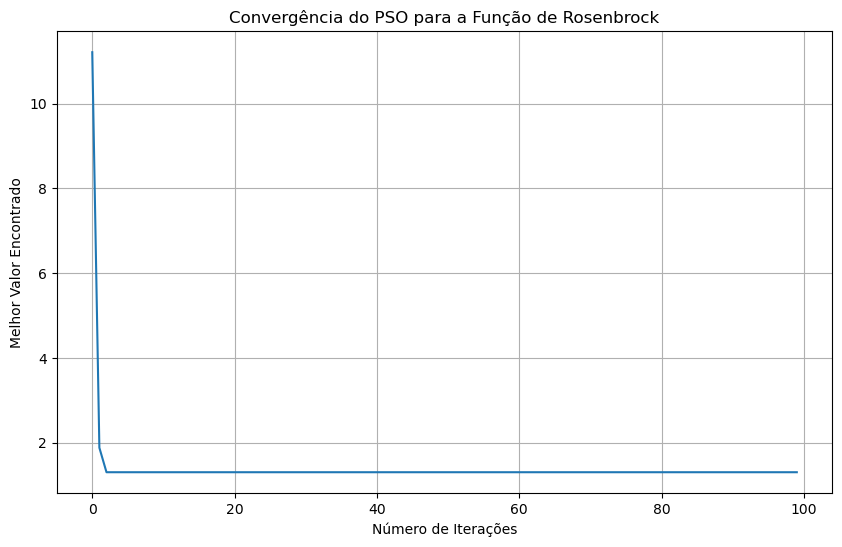

Melhor valor encontrado: 1.3044654053248101
Posição correspondente: [ 4.26455859 -4.15869406]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Função de Rosenbrock (a ser minimizada)
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Função para inicializar as partículas
def initialize_particles(num_particles, bounds):
    particles = []
    for _ in range(num_particles):
        x = np.random.uniform(bounds[0], bounds[1])
        y = np.random.uniform(bounds[0], bounds[1])
        position = np.array([x, y])
        velocity = np.random.rand(2)  # Velocidade inicial aleatória
        particles.append({'position': position, 'velocity': velocity, 'best_position': position})
    return particles

# Função para atualizar a posição das partículas
def update_particles(particles, global_best_position, inertia_weight, cognitive_weight, social_weight):
    for particle in particles:
        r1, r2 = np.random.rand(2)  # Valores randômicos para atualização
        velocity = (inertia_weight * particle['velocity'] +
                    cognitive_weight * r1 * (particle['best_position'] - particle['position']) +
                    social_weight * r2 * (global_best_position - particle['position']))
        particle['position'] += velocity
        particle['velocity'] = velocity

# Configuração do PSO
num_particles = 30
num_iterations = 100
bounds = (-5, 5)
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

# Inicialização das partículas
particles = initialize_particles(num_particles, bounds)

# Variáveis para rastrear o melhor valor global e a melhor posição global
global_best_value = float('inf')
global_best_position = None

# Listas para armazenar os valores das melhores soluções em cada iteração
best_values = []

# Executa o PSO
for iteration in range(num_iterations):
    for particle in particles:
        x, y = particle['position']
        value = rosenbrock(x, y)

        if value < global_best_value:
            global_best_value = value
            global_best_position = particle['position']

        if value < rosenbrock(*particle['best_position']):
            particle['best_position'] = particle['position']

    update_particles(particles, global_best_position, inertia_weight, cognitive_weight, social_weight)
    best_values.append(global_best_value)

# Plotagem do gráfico de convergência
plt.figure(figsize=(10, 6))
plt.plot(best_values)
plt.xlabel('Número de Iterações')
plt.ylabel('Melhor Valor Encontrado')
plt.title('Convergência do PSO para a Função de Rosenbrock')
plt.grid(True)
plt.show()

print(f'Melhor valor encontrado: {global_best_value}')
print(f'Posição correspondente: {global_best_position}')

Este código implementa o algoritmo PSO para minimização da função de Rosenbrock e exibe um gráfico de convergência mostrando como o valor da função diminui ao longo das iterações. Certifique-se de ter a biblioteca numpy e matplotlib instalada para executar este código.

### Outra Maneira de Calcular o Vi

$$\vec{V_i} \leftarrow W \cdot \vec{V_i} + R_1 \cdot F_{ic}(\vec{P_i} - \vec{X_i}) + R_2 \cdot F_{i1}(\vec{g} - \vec{X_i})$$
- W -> inércia entre 0 e 1
- R1 e R2 -> Valor aleatório entre 0 e 1



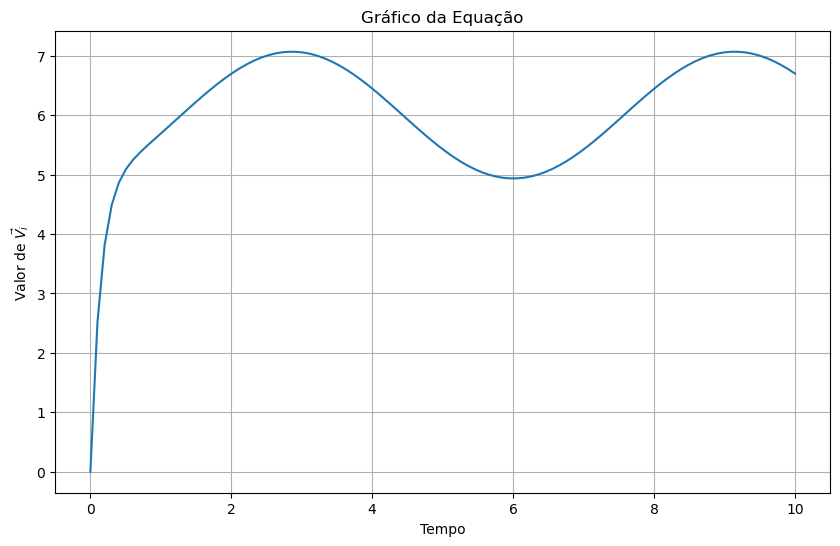

<IPython.core.display.Math object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Parâmetros
W = 0.5
R1 = 0.2
R2 = 0.3
g = 10.0

# Vetores de tempo e variáveis
t = np.linspace(0, 10, 100)
Vi = np.zeros_like(t)
Pi = np.sin(t)
Xi = np.cos(t)

# Calcula Vi usando a equação
for i in range(1, len(t)):
    Vi[i] = W * Vi[i-1] + R1 * (Pi[i] - Xi[i]) + R2 * (g - Xi[i])

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, Vi)
plt.xlabel('Tempo')
plt.ylabel('Valor de $\\vec{V_i}$')
plt.title('Gráfico da Equação')
plt.grid(True)
plt.show()

# Exibe a equação usando a função display do IPython
equation = r'\vec{V_i} \leftarrow W \cdot \vec{V_i} + R_1 \cdot F_{ic}(\vec{P_i} - \vec{X_i}) + R_2 \cdot F_{i1}(\vec{g} - \vec{X_i})'
display(Math(equation))

# Exercício - Aula 5 – Inteligência de Enxame

Considere a função de duas variáveis reais $x$ e $y$ definidas por:

$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$- 
(Função de Himmelblau) com $-5 \leq x, y \leq 5$. Implemente um PSO para buscar valores de $x$ e $y$ que minimizam a função $f$. Varie os parâmetros de "inércia cognitiva" e "inércia social" e analise a qualidade das soluções encontradas, bem como a quantidade de iterações necessárias para chegar a essas soluções.
.

In [1]:
import numpy as np

# Definir a função de Himmelblau
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Parâmetros do PSO
num_particles = 30
max_iter = 100
w = 0.5  # Inércia cognitiva
c1 = 1.5  # Coeficiente de influência cognitiva (inércia pessoal)
c2 = 1.5  # Coeficiente de influência social (inércia social)

# Inicialização das partículas
particles = np.random.uniform(-5, 5, size=(num_particles, 2))
velocities = np.random.uniform(-1, 1, size=(num_particles, 2))
personal_best_positions = particles.copy()
personal_best_values = np.array([himmelblau(x, y) for x, y in particles])
global_best_idx = np.argmin(personal_best_values)
global_best_position = personal_best_positions[global_best_idx]
global_best_value = personal_best_values[global_best_idx]

# Execução do PSO
for iteration in range(max_iter):
    for i in range(num_particles):
        # Atualizar a velocidade da partícula
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i] +
                          c1 * r1 * (personal_best_positions[i] - particles[i]) +
                          c2 * r2 * (global_best_position - particles[i]))
        
        # Atualizar a posição da partícula
        particles[i] = particles[i] + velocities[i]
        
        # Avaliar a nova posição
        current_value = himmelblau(particles[i, 0], particles[i, 1])
        
        # Atualizar o melhor valor pessoal e posição
        if current_value < personal_best_values[i]:
            personal_best_values[i] = current_value
            personal_best_positions[i] = particles[i]
        
        # Atualizar o melhor valor global e posição
        if current_value < global_best_value:
            global_best_value = current_value
            global_best_position = particles[i]
    
    print(f"Iteração {iteration+1}: Melhor valor = {global_best_value:.4f}")

print(f"Solução encontrada: x = {global_best_position[0]:.4f}, y = {global_best_position[1]:.4f}")

Iteração 1: Melhor valor = 0.0260
Iteração 2: Melhor valor = 0.0260
Iteração 3: Melhor valor = 0.0260
Iteração 4: Melhor valor = 0.0260
Iteração 5: Melhor valor = 0.0008
Iteração 6: Melhor valor = 0.0008
Iteração 7: Melhor valor = 0.0008
Iteração 8: Melhor valor = 0.0008
Iteração 9: Melhor valor = 0.0008
Iteração 10: Melhor valor = 0.0008
Iteração 11: Melhor valor = 0.0008
Iteração 12: Melhor valor = 0.0003
Iteração 13: Melhor valor = 0.0003
Iteração 14: Melhor valor = 0.0001
Iteração 15: Melhor valor = 0.0001
Iteração 16: Melhor valor = 0.0001
Iteração 17: Melhor valor = 0.0000
Iteração 18: Melhor valor = 0.0000
Iteração 19: Melhor valor = 0.0000
Iteração 20: Melhor valor = 0.0000
Iteração 21: Melhor valor = 0.0000
Iteração 22: Melhor valor = 0.0000
Iteração 23: Melhor valor = 0.0000
Iteração 24: Melhor valor = 0.0000
Iteração 25: Melhor valor = 0.0000
Iteração 26: Melhor valor = 0.0000
Iteração 27: Melhor valor = 0.0000
Iteração 28: Melhor valor = 0.0000
Iteração 29: Melhor valor = 0